#Haberman Cancer survival dataset (EDA)

In [1]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)

Or from below drive link  (https://drive.google.com/file/d/1GzeBrb6NEnFoChpSGveToFeBwLOU8dD2/view?usp=sharing)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#Load haberman.csv into a pandas dataFrame.
cancer_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/haberman.csv')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# (Q) how many data-points and features?
print (cancer_data.shape)

(306, 4)


In [4]:
#(Q) What are the column names in our dataset?
print (cancer_data.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


Intutution from AAIC and https://towardsdatascience.com/exploratory-data-analysis-habermans-cancer-survival-dataset-c511255d62cb


**Domain knowledge:**
```
Age of patient at the time of operation (numerical)
Patient’s year of operation (year — 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) :
1 = the patient survived 5 years or longer
2 = the patient died within 5 years
```



**Understanding lymph nodes :**

https://towardsdatascience.com/will-habermans-survival-data-set-make-you-diagnose-cancer-8f40b3449673

"""
Lymph Node: Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. 
As lymph fluid leaves the breast and eventually goes back into the bloodstream, 
the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. 
Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading.
In our data it is axillary nodes detected(0–52)
"""

In [5]:
print('Nodes min value: ',cancer_data['nodes'].min())
print('Nodes max value: ',cancer_data['nodes'].max())

Nodes min value:  0
Nodes max value:  52


In [6]:
#(or) How many datapoints for each survival status are present?

cancer_data['status'].value_counts()
# balanced-dataset vs imbalanced datasets
#Haberman is a imbalanced dataset as the number of data points for every class varies largely

1    225
2     81
Name: status, dtype: int64

1. Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
2. Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.

#Bi-variate analysis

# 2-D Scatter Plot

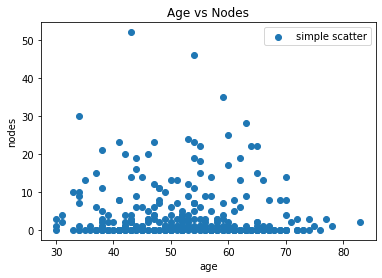

In [7]:
plt.scatter(cancer_data['age'], cancer_data['nodes'], marker = 'o')
plt.xlabel('age')
plt.ylabel('nodes')
plt.title('Age vs Nodes')
plt.legend(['simple scatter'])
plt.show()

In [0]:
#plt.legend?

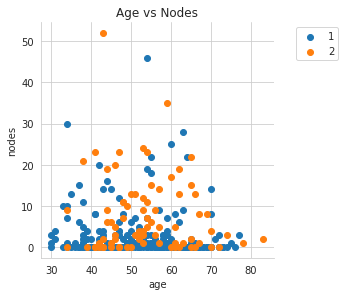

In [9]:
# 2-D Scatter plot with color-coding for each survival status type/class.

sns.set_style("whitegrid");
sns.FacetGrid(cancer_data, hue="status", height =4) \
   .map(plt.scatter, "age", "nodes") 

plt.title('Age vs Nodes')
plt.legend(   loc='best', bbox_to_anchor=(1, 0, 0.3,1))
#plt.legend?
plt.show();

# Notice that the blue points and red points cannot be seperated 
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 3C2 = 3. (Age,Year,Nodes)

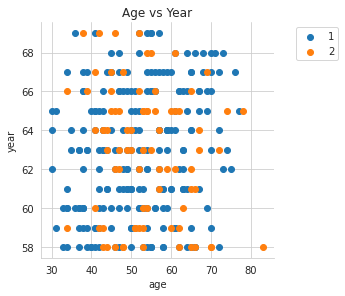

In [10]:

sns.set_style("whitegrid");
sns.FacetGrid(cancer_data, hue="status", height =4) \
   .map(plt.scatter, "age", "year") 

plt.title('Age vs Year')
plt.legend(   loc='best', bbox_to_anchor=(1, 0, 0.3,1))
#plt.legend?
plt.show();

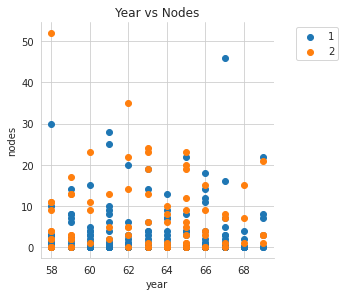

In [11]:

sns.set_style("whitegrid");
sns.FacetGrid(cancer_data, hue="status", height =4) \
   .map(plt.scatter, "year", "nodes")

plt.title('Year vs Nodes')
plt.legend(   loc='best', bbox_to_anchor=(1, 0, 0.3,1))
#plt.legend?
plt.show();

**Observation(s):**
1. Age vs Nodes plot makes some sense to classify the when to compared to other plots

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

In [12]:
import plotly.express as px
fig = px.scatter_3d(cancer_data, x='age', y='year', z='nodes',
              color='status')
fig.show()

# Pair-plot

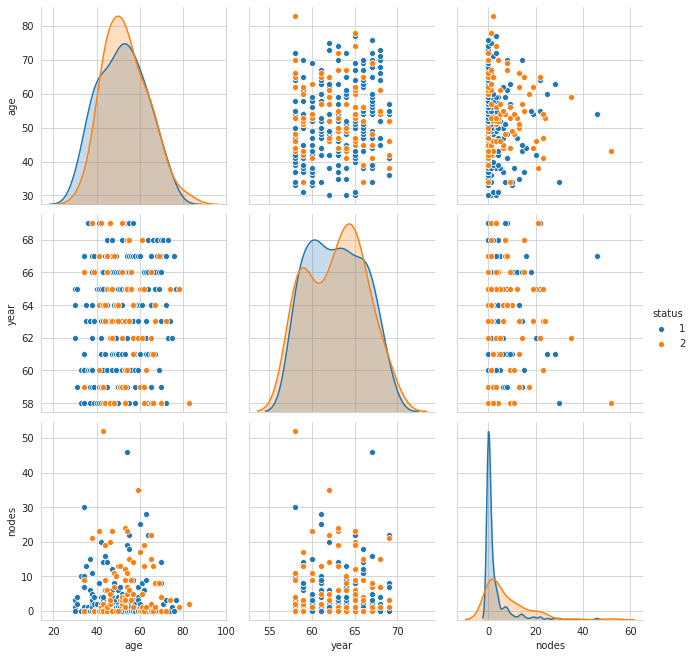

In [13]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(cancer_data, hue="status", height=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations:**
1. Plots 1,5,9 are PDF's of Age,Year and Nodes respectively.
2. As we see in the above plots status cannot be distinguished in plot2  Age vs Year
3. Plot3 Age vs nodes is somewhat better for classifying data compared to other combination of data
4. Plot3 and plot 7 both are same.
5. Considering plot 3 for further analysis


#Univariate analysis

# Histogram, PDF, CDF

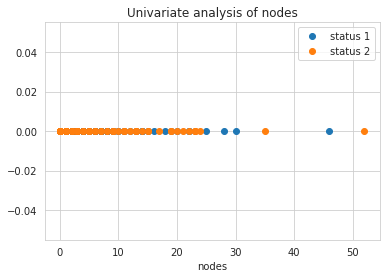

In [14]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
# status_1 = cancer_data[cancer_data['status'] == 1] #Basic method
status_1 = cancer_data.loc[cancer_data['status'] == 1]
status_2 = cancer_data.loc[cancer_data['status'] == 2]

plt.plot(status_1["nodes"], np.zeros_like(status_1['nodes']), 'o')
plt.plot(status_2["nodes"], np.zeros_like(status_2['nodes']), 'o')

plt.xlabel('nodes')
plt.title('Univariate analysis of nodes')
plt.legend(['status 1','status 2'])
plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Histogram is better ways of visualizing 1-D scatter plots 

**Histograms**

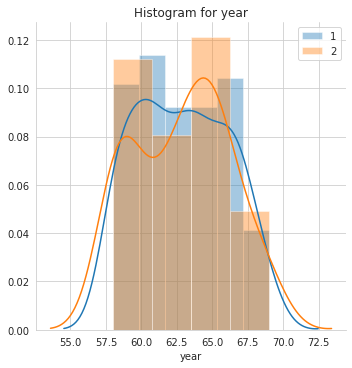

In [15]:
sns.FacetGrid(cancer_data, hue="status", height=5) \
   .map(sns.distplot, "year") 

plt.title('Histogram for year')
plt.legend()
plt.show();


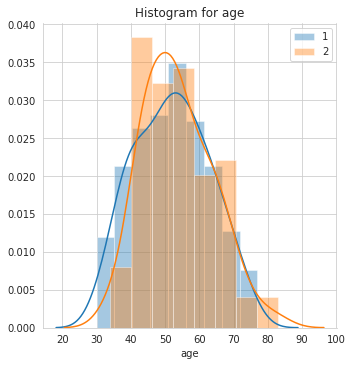

In [16]:
sns.FacetGrid(cancer_data, hue="status", height=5) \
   .map(sns.distplot, "age") 

plt.title('Histogram for age')
plt.legend()
plt.show();



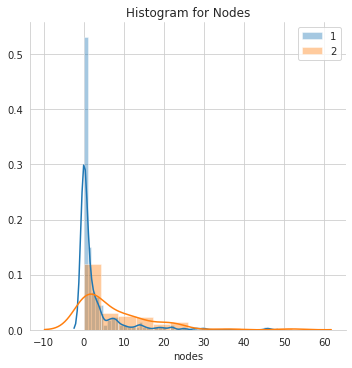

In [17]:
sns.FacetGrid(cancer_data, hue="status", height=5) \
   .map(sns.distplot, "nodes") 

plt.title('Histogram for Nodes')
plt.legend()
plt.show();



***Observations from Histograms:***
1. Histograms are better to visualize 1D scatter plots very well
2. Here Nodes is the best feature to be considered for classification of status 1 and 2 data
3. Consider the above Nodes - Histogram from which we can tell teh below points
4. When the no of nodes are 0 - 4(approx) then is more that a person can serve more than 5 years as in this portion blue is above the red curve
5. From nodes count 4 - 52 then there is more than that person cannot survive more than 5 yrs

In [0]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
# Disadv of PDF: Can we say what percentage of status_1 points have a nodes of less than 4?


PDF and CDF for Status_1 data using nodes column

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]




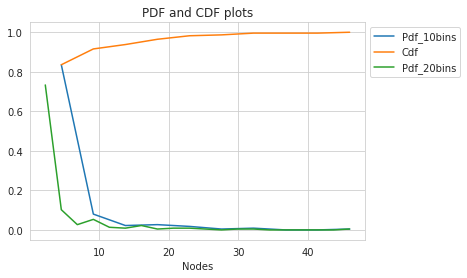

In [18]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of status_1 points have a 
# nodes of less than 4?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(status_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
print(cdf)
print('\n')
plt.plot(bin_edges[1:], pdf ) 
plt.plot(bin_edges[1:], cdf ) 


counts, bin_edges = np.histogram(status_1['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf );
plt.xlabel('Nodes')
plt.title('PDF and CDF plots')
plt.legend( ['Pdf_10bins','Cdf','Pdf_20bins'],  loc='best', bbox_to_anchor=(1, 0, 0.3,1))
plt.show();


**Observations:**
1. PDF is nothing but smoothed curve of histogram
2. Histogram for same data varies with the no of bins
3. So, PDF curve also when the no of bins change
4. If you see above CDF and data displayed 83.56% of status 1 data points lie in the bin [0-4.6)
5. 91.55% of status 1 data lie in the bin [0,9.2)
6. 100% of status 1 data lie btw [0,46]

PDF and CDF for Status_2 data using nodes column

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]




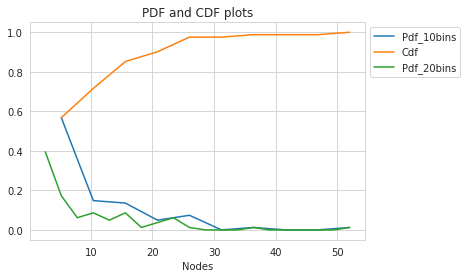

In [19]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of status_1 points have a 
# nodes of less than 4?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(status_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
print(cdf)
print('\n')
plt.plot(bin_edges[1:], pdf ) 
plt.plot(bin_edges[1:], cdf ) 


counts, bin_edges = np.histogram(status_2['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf );
plt.xlabel('Nodes')
plt.title('PDF and CDF plots')
plt.legend( ['Pdf_10bins','Cdf','Pdf_20bins'],  loc='best', bbox_to_anchor=(1, 0, 0.3,1))
plt.show();


**Obeservations**
1. Nearly 56.79 % of status 2 lie in the bin [0,5.2)
2. 71.604% of status 2 data lie in the bin [0,10.4)
3. 100% of status 2 data lie btw [0,52]

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]




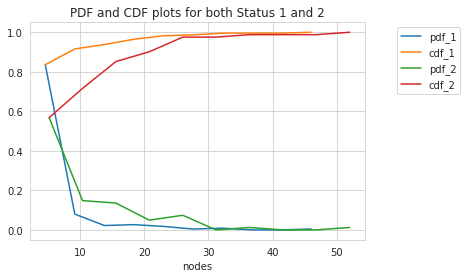

In [20]:
# Plots of CDF of petal_length for various types of survival status data.


# Status 1 --- survived more than  after operation
counts, bin_edges = np.histogram(status_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Status 2 --- survived less than  after operation
counts, bin_edges = np.histogram(status_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
print('\n')
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('nodes')
plt.title('PDF and CDF plots for both Status 1 and 2')
plt.legend(['pdf_1','cdf_1','pdf_2','cdf_2'],  loc='best', bbox_to_anchor=(1, 0, 0.3,1))
plt.show();

# Mean, Variance and Std-dev

In [21]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(status_1["nodes"]))
#Mean with an outlier.
print('with outlier :',np.mean(np.append(status_1["nodes"],80)));
print(np.mean(status_2["nodes"]))

print("\nStd-dev:");
print(np.std(status_1["nodes"]))
print(np.std(status_2["nodes"]))


Means:
2.7911111111111113
with outlier : 3.1327433628318584
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


**Observations:**
1. If we calculate mean and variance we can anlayse so many things.
2. We can use [empirical rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule) to analyse the data very well
3. Ex: Here 68% of status_1 data lies btw 2.79-5.85 and 2.79+5.85
4. Ex: Here 68% of status_2 data lies btw 7.456-9.128 and 7.456+9.128

#Median, Percentile, Quantile, IQR, MAD

In [22]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(status_1["nodes"]))
#Median with an outlier
print('median with outlier',np.median(np.append(status_1["nodes"],50)));
print(np.median(status_2["nodes"]))


print("\nQuantiles:")
print(np.percentile(status_1["nodes"],np.arange(0, 101, 25)))
# np.arange(0, 101, 25)) --> [  0,  25,  50,  75, 100]  --  So, all the quantiles will be calculated
print(np.percentile(status_2["nodes"],np.arange(0, 101, 25)))

print("\n90th Percentiles:")
print(np.percentile(status_1["nodes"],90))
print(np.percentile(status_2["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(status_1["nodes"]))
print(robust.mad(status_2["nodes"]))



Medians:
0.0
median with outlier 0.0
4.0

Quantiles:
[ 0.  0.  0.  3. 46.]
[ 0.  1.  4. 11. 52.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


**Obseravtions**
1. Median will not get affected in the presence of outlier unlike to mean 
2. We can see that above for with outlier and without outlier median remains same
3. By seeing quantiles we can say

  > 25% of status_2 data lies btw [0,1]

  > 50% of status_2 data lies btw [0,4]

  > 75% of status_2 data lies btw [0,11]
  
  > 100% of status_2 data lies btw [0,52]

#Box plot and Whiskers

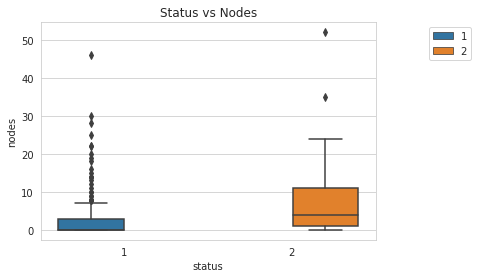

In [23]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='status',y='nodes', hue = 'status', data=cancer_data )

plt.title('Status vs Nodes')
plt.legend(loc = 'best', bbox_to_anchor=(1, 0, 0.3,1))
plt.show()

**Observations**
1. Using box we can calculate IQR (Inter Quartile Range) 25% - 75% values
2. We can also see the outliers in the box plot which are iutside the whiskers
3. Here we can always say that 50% of your data lies in the IQR (i.e..,)

>> For status 1 - definitely 50% of your whole data lies btw [0,3]

>> For status 2 - definitely 50% of your whole data lies btw [0,11]

4. We can see the max values in box plot also 
>For ex: For status_2 the nodes max value is 52 nodes we can see that in plot as well
5. We can also observe variance or spread of the data along with outliers

#Violin plots

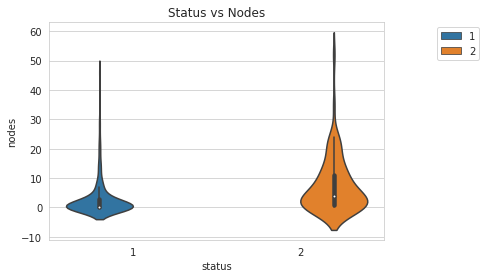

In [24]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x='status',y='nodes',hue = 'status', data=cancer_data, size=8)

plt.title('Status vs Nodes')
plt.legend(loc = 'best', bbox_to_anchor=(1, 0, 0.3,1))
plt.show()

***Violin plot is also similar to Box plot except it has PDF on it's side***

#Multivariate probability density, contour plot.


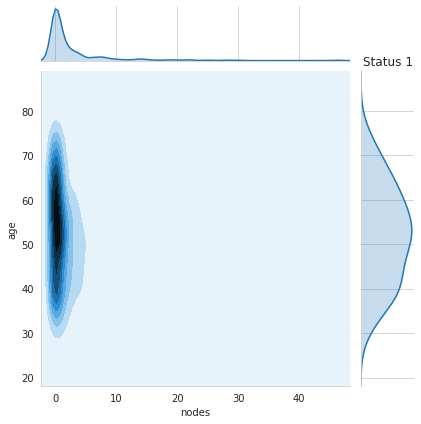

In [25]:
#As we dicussed in pair plots plot 3 : Age vs Nodes will be used for classifying data here 
#Plottion contour plot on Age vs Nodes
#2D Density plot, contors-plot
sns.jointplot(x="nodes", y="age", data=status_1 , kind="kde");
plt.title('Status 1')
plt.show();


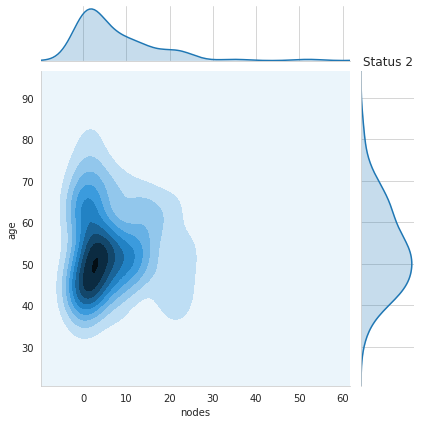

In [26]:
#As we dicussed in pair plots plot 3 : Age vs Nodes will be used for classifying data here 
#Plottion contour plot on Age vs Nodes
#2D Density plot, contors-plot
sns.jointplot(x="nodes", y="age", data=status_2 , kind="kde");
plt.title('Status 2')
plt.show();


**Observations:**
1. The dense region in contour plot indicates that the points density is more in that region
2. We can also see beautiful PDF's of respective columns on the sideways.
2. From contour plot 1:
>Here More points are present in the region ( nodes [0,3] and Age (30-60) )
3. From contour plot 2:
>Here More points are present in the region ( nodes [1,10] approx and Age (30-61) )

In [27]:
status_2.describe()

,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


In [28]:
status_1.describe()

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [29]:
print('********End***********')

********End***********
